# Election Analysis Project

# <font color='blue'> Geographical Analysis

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('2019 DMK Lok.csv')

In [4]:
data

,#,Position,Candidate,PC Name,State,Electors,Votes,Turnout,DMK Votes,DMK Votes %,ACs
0,1,1,S. Jagathrakshakan,Arakkonam,Tamil Nadu,1461110,1178060,81.5 %,672190,57.7 %,AC View
1,2,1,Dayanidhi Maran,Chennai Centra,Tamil Nadu,1316388,785450,60.7 %,448911,58.2 %,AC View
2,3,1,Dr. Kalanidhi Veeraswamy,Chennai North,Tamil Nadu,1444753,955545,67.2 %,590986,62.9 %,AC View
3,4,1,T.Sumathy (A) THAMIZHACHI THANGAPANDIAN,Chennai South,Tamil Nadu,1916378,1125857,59.6 %,564872,50.9 %,AC View
4,5,1,T. R. V .S. Ramesh,Cuddalore,Tamil Nadu,1342320,1043202,78.4 %,522160,50.5 %,AC View
5,6,1,Dnv Senthilkumar. S.,Dharmapuri,Tamil Nadu,1453257,1223205,85.1 %,574988,47.5 %,AC View
6,7,1,"Velusamy, P.",Dindigul,Tamil Nadu,1518633,1160046,77.3 %,746523,65.2 %,AC View
7,8,1,Ganeshamurthi A,Erode,Tamil Nadu,1427534,1067863,75.8 %,563591,53.5 %,AC View
8,9,1,Gautham Sigamani Pon,Kallakurichi,Tamil Nadu,1490339,1204375,81.6 %,721713,60.5 %,AC View
9,10,1,Selvam.G,Kancheepuram,Tamil Nadu,1601060,1237612,78.7 %,684004,56.3 %,AC View


## 1) Can we identify any regional preferences in voting based on the performance of candidates in specific districts or regions?

In [5]:
data.columns

Index(['#', 'Position', 'Candidate', 'PC Name', 'State', 'Electors', 'Votes',
       'Turnout', 'DMK Votes', 'DMK Votes %', 'ACs'],
      dtype='object')

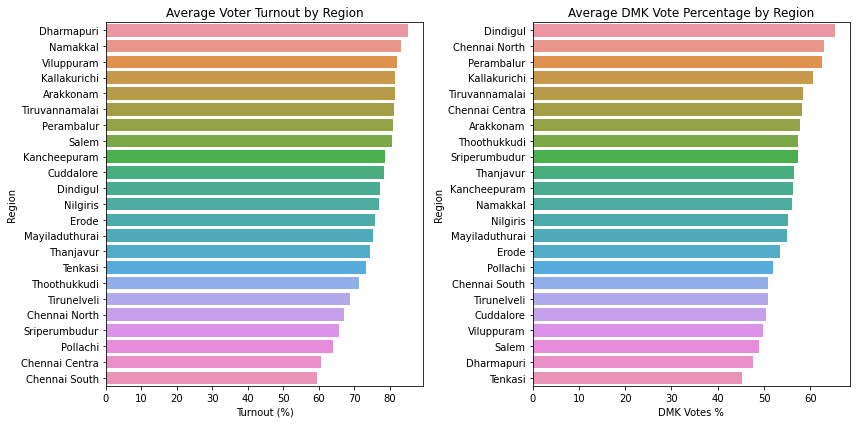

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Remove the percentage sign and convert to numeric
data['Turnout'] = data['Turnout'].str.replace('%', '').astype(float)
data['DMK Votes %'] = data['DMK Votes %'].str.replace('%', '').astype(float)

# 1. Aggregate Data by Region
region_data = data.groupby('PC Name').agg({
    'Votes': 'sum',
    'Turnout': 'mean',
    'DMK Votes %': 'mean'
}).reset_index()

# 2. Analyze Voter Turnout
avg_turnout_by_region = region_data[['PC Name', 'Turnout']]

# 3. Examine Vote Percentages
avg_dmk_vote_percent_by_region = region_data[['PC Name', 'DMK Votes %']]

# 4. Visualize the Data
plt.figure(figsize=(12, 6))

# Bar plot for average voter turnout by region
plt.subplot(1, 2, 1)
sns.barplot(x='Turnout', y='PC Name', data=avg_turnout_by_region.sort_values(by='Turnout', ascending=False))
plt.title('Average Voter Turnout by Region')
plt.xlabel('Turnout (%)')
plt.ylabel('Region')

# Bar plot for average DMK vote percentage by region
plt.subplot(1, 2, 2)
sns.barplot(x='DMK Votes %', y='PC Name', data=avg_dmk_vote_percent_by_region.sort_values(by='DMK Votes %', ascending=False))
plt.title('Average DMK Vote Percentage by Region')
plt.xlabel('DMK Votes %')
plt.ylabel('Region')

plt.tight_layout()
plt.show()
